In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [291]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.shape, test.shape

((42000, 785), (28000, 784))

In [333]:
train_Y= train["label"]
train_X_unNormal = train.drop(["label"], axis = 1)
test_X_unNormal  = test

In [299]:
train_X_unNormal.shape, test.shape, train_Y.shape

((42000, 784), (28000, 784), (42000,))

In [300]:
trainImage = train_X_unNormal.values
trainImage = trainImage.reshape(42000, 28,28)

Label:  3


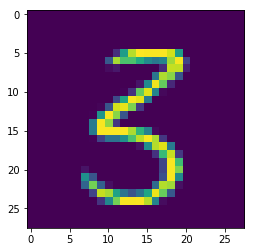

In [301]:
j = 46
print("Label: ", train_Y[j])
plt.imshow(trainImage[j])

In [334]:
train_X = train_X_unNormal/255.
test_X = test_X_unNormal/255.

## Building Neural network

Now the Data is completely processed and ready to use as input for neural network
To Build Neural Network following step should be followed
1. Initializing parameters of an L layer neural Network ( I have to decide the architecture of network- Number of Hidden layer(L), hidden units per layers, Activation function for the layers) 

2. Loop for num_iterations:

    a. Forward propagation   
    b. Compute cost function    
    c. Backward propagation
    
    d. Update parameters (using parameters, and grads from backprop) 
    
4. Use trained parameters to predict labels


In [303]:
train_Xf = train_X.T
test_Xf = test_X.T
train_Yf = train_Y.T
train_Yf1 = train_Y.values
train_Yf = train_Yf1.reshape(42000,1).T
train_Xf.shape, test_Xf.shape, train_Yf.shape

((784, 42000), (784, 28000), (1, 42000))

In [304]:
m = train_Xf.shape[1]
n_x = train_Xf.shape[0]
m, n_x

(42000, 784)

In [305]:
def initialize_parameters(layer_dims):
    L = len(layer_dims) - 1    # n_x is for input layer
    parameters = {}
    for l in range(L):
        parameters["W"+str(l+1)] = np.random.randn(layer_dims[l+1], layer_dims[l])*0.01
        parameters["b"+str(l+1)] = np.zeros((layer_dims[l+1],1))
    return parameters

In [306]:
#Checking Initializing function
layer_dims = [4, 5, 6, 3,2]
parameters = initialize_parameters(layer_dims)
parameters["W1"].shape

(5, 4)

## Writing helper functions



In [307]:
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) +b
    cache = (A_prev, W, b)
    return Z, cache

In [308]:
np.random.seed(1)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
#array([[ 3.26295337, -1.23429987]])

In [309]:
linear_forward(A, W, b)

(array([[ 3.26295337, -1.23429987]]), (array([[ 1.62434536, -0.61175641],
         [-0.52817175, -1.07296862],
         [ 0.86540763, -2.3015387 ]]),
  array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]),
  array([[-0.24937038]])))

In [310]:
def linear_activation_forward(A_prev, W, b , activation):
    Z, linear_cache = linear_forward(A_prev, W, b)  # linear cache =(A-prev, W, b)
    activation_cache = Z
    
    if activation == "relu":
        A = np.maximum(0,Z)
        
    if activation == "sigmoid":
        A = 1/(1+np.exp(-Z))
        
    if activation == "softmax":
        t = np.exp(Z)   #Z=> (l, m) -> t => (l,m)
        t_sum_vertical = np.sum(t, axis=0,keepdims = True)
        A = np.divide(t, t_sum_vertical)
        
    assert(A.shape == Z.shape)
    cache = (linear_cache, activation_cache)
    return A, cache

In [311]:
np.random.seed(2)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
    
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [312]:
A_prev = np.array([[1,0],[0,1],[0,1]])
W = np.array([[2,1,.1],[1,3,.4]])
b = np.array([[0]])
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "softmax")
print("With Softmax: A = " + str(A))
A.shape

With Softmax: A = [[0.73105858 0.09112296]
 [0.26894142 0.90887704]]


(2, 2)

**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


In [313]:
def L_model_forward(X, parameters):
    L = len(parameters)//2
    A_prev = X
    caches = []
    for l in range(1, L):
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)], activation = "relu")
        caches.append(cache)
        A_prev = A
    A, cache = linear_activation_forward(A_prev, parameters["W"+str(L)], parameters["b"+str(L)], activation = "softmax")
    caches.append(cache)
    AL = A
    return AL, parameters, caches

In [314]:
np.random.seed(1)
X = np.random.randn(4,2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
AL, parameters, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[1. 1.]]
Length of caches list = 2


In [315]:
np.random.seed(6)
X = np.random.randn(5,4)
W1 = np.random.randn(4,5)
b1 = np.random.randn(4,1)
W2 = np.random.randn(3,4)
b2 = np.random.randn(3,1)
W3 = np.random.randn(1,3)
b3 = np.random.randn(1,1)

parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
   
AL, parameters, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[1. 1. 1. 1.]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td> 
  </tr>
</table>

Great! Now you have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

In [316]:
def one_hot_encode(Y, K):
    Y_onehot = np.zeros((K, Y.shape[1]))
    for i in range(Y.shape[1]):
        level = Y[0][i]
        Y_onehot[level][i]=1
    return Y_onehot

## 5 - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.


In [318]:
def comput_cost_softmax(A, Y):
    m = Y.shape[1]
    cost = -Y*np.log(A)
    cost = np.sum(cost)
    cost = cost/m
    return cost

In [319]:
A= np.array([[.3,.4,.6,.7],
            [.2,.4,.5,.6]])
A = A.T
Y = np.array([[1,0],
             [0,1],
             [0,0],
             [0,0]])
cost = comput_cost_softmax(A,Y)
cost

1.0601317681000455

## 6 - Backward propagation module

<img src="BuildingBlocksBackprop1.jpeg" style="width:450px;height:550px;">


In [321]:
def linear_backward(dZ, cache):
    # cache have A_prev, W, b in it
    A_prev, W, b = cache
    m = dZ.shape[1]
    
    dA_prev = np.dot(W.T, dZ)
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis =1, keepdims = True)
    
    return dA_prev, dW, db

In [322]:
np.random.seed(1)
dZ = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
linear_cache = (A, W, b)
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


**Expected Output**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] </td> 
  </tr> 
    <tr>
        <td> **dW** </td>
        <td > [[-0.10076895  1.40685096  1.64992505]] </td> 
    </tr>  
    <tr>
        <td> **db** </td>
        <td> [[ 0.50629448]] </td> 
    </tr> 
    
</table>

In [323]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    A_prev , W, b = linear_cache
    Z = activation_cache
    if activation == "sigmoid":
        sigma = 1/(1+np.exp(-Z))
        dsigma_dZ = sigma*(1-sigma)
        dZ = dA*dsigma_dZ
    if activation == "relu":
        dZ = np.array(dA, copy=True) # just converting dz to a correct object    
        # When z <= 0, you should set dz to 0 as well. 
        dZ[Z <= 0] = 0
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db 

In [324]:
np.random.seed(2)
dA = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)
linear_cache = (A, W, b)
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)
dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 

  </tr>  
    <tr>
    <td > dW </td> 
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr>  
    <tr>
    <td > db </td> 
           <td > [[-0.05729622]] </td> 
  </tr> 
</table>


**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 

  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr> 
      <tr>
    <td > db </td> 
           <td > [[-0.20837892]] </td> 
  </tr> 
</table>



In [325]:
def L_model_backward(AL, Y, caches):
    #caches is list of all layers cache = (linear_cache, activation_cache) 
    L = len(caches)
    #print("Number of layers: ",L)
    grads = {}
    dAL = -(Y/AL) - ((1-Y)/(1-AL))
    cache = caches[-1]

    dZL = AL-Y
    grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = linear_backward(dZL,cache[0] )
    #grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = linear_activation_backward(dAL, cache, activation = "sigmoid")
    for l in reversed(range(L-1)):
        cache = caches[l]
        grads["dA"+str(l)], grads["dW"+str(l+1)], grads["db"+str(l+1)] = linear_activation_backward(grads["dA"+str(l+1)], cache, activation = "relu")
        
    return grads

In [326]:
np.random.seed(3)
AL = np.random.randn(1, 2)
Y = np.array([[1, 0]])

A1 = np.random.randn(4,2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
Z1 = np.random.randn(3,2)
linear_cache_activation_1 = ((A1, W1, b1), Z1)

A2 = np.random.randn(3,2)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
Z2 = np.random.randn(1,2)
linear_cache_activation_2 = ((A2, W2, b2), Z2)

caches = (linear_cache_activation_1, linear_cache_activation_2)

grads = L_model_backward(AL, Y, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41642713 0.07927654 0.14011329 0.10664197]
 [0.         0.         0.         0.        ]
 [0.05365169 0.01021384 0.01805193 0.01373955]]
db1 = [[-0.22346593]
 [ 0.        ]
 [-0.02879093]]
dA1 = [[-0.80745758 -0.44693186]
 [ 0.88640102  0.49062745]
 [-0.10403132 -0.05758186]]


**Expected Output**

<table style="width:60%">
  
  <tr>
    <td > dW1 </td> 
           <td > [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]] </td> 
  </tr>  
    <tr>
    <td > db1 </td> 
           <td > [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] </td> 
  </tr> 
  
  <tr>
  <td > dA1 </td> 
           <td > [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]] </td> 

  </tr> 
</table>


### 6.4 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 


In [327]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters)//2
    for l in range(1, L+1):
        parameters["W"+str(l)] = parameters["W"+str(l)] - learning_rate*grads["dW"+str(l)]
        parameters["b"+str(l)] = parameters["b"+str(l)] - learning_rate*grads["db"+str(l)]
    return parameters

In [328]:
np.random.seed(2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3,4)
db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3)
db2 = np.random.randn(1,1)
grads = {"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr>   
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr>   
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>


In [329]:
def model(X, Y, learning_rate, num_iteration,hidden_layers, print_cost = False):
    n_x = X.shape[0]
    n_y = 10
    layer_dims = [n_x]+ hidden_layers +[n_y]
    #Initializeing parameters
    parameters = initialize_parameters(layer_dims)
    Y1 = one_hot_encode(Y, 10)
    
    for i in range(num_iteration):
        
        AL, parameters, caches = L_model_forward(X, parameters)
        cost = comput_cost_softmax(AL,Y1)
        grads = L_model_backward(AL, Y1, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if (print_cost==True) and i%100==0:
            print("cost after ",i, " iterations:",cost)
    return parameters

In [331]:
X = train_Xf
Y = train_Yf
learning_rate = 0.1
num_iteration = 10000
hidden_layers = [25]
parameters = model(X, Y, learning_rate, num_iteration,hidden_layers, print_cost = True)

cost after  0  iterations: 2.3027304284136783
cost after  100  iterations: 1.3345346891526544
cost after  200  iterations: 0.6033945979447075
cost after  300  iterations: 0.4529486085112411
cost after  400  iterations: 0.3894617275495992
cost after  500  iterations: 0.3542068629615557
cost after  600  iterations: 0.3309131523209938
cost after  700  iterations: 0.31369239356730527
cost after  800  iterations: 0.3000386180974511
cost after  900  iterations: 0.2887783035454055
cost after  1000  iterations: 0.27922394969109676
cost after  1100  iterations: 0.2709397372852224
cost after  1200  iterations: 0.2636134886273709
cost after  1300  iterations: 0.2569463100394571
cost after  1400  iterations: 0.2508519473443292
cost after  1500  iterations: 0.24529852820570924
cost after  1600  iterations: 0.24020648874845965
cost after  1700  iterations: 0.23545378131874795
cost after  1800  iterations: 0.2310137314721877
cost after  1900  iterations: 0.2268689231966764
cost after  2000  iteration

In [335]:
def predict(X, parameters):
    m = X.shape[1] 
    AL, parameters, caches = L_model_forward(X, parameters)
    
    K = AL.shape[0]
    Y_predicted = np.zeros((1,m))
    for i in range(m):
        mx = max(AL[:,i])
        for j in range(K):
            if AL[j][i] == mx:
                Y_predicted[0][i]=j
                break
    return  Y_predicted

In [336]:
Y_predicted = predict(X, parameters)

In [337]:
accuracy = (np.sum(Y_predicted==Y)/m)*100
print("Accuracy=",accuracy)

Accuracy= 97.42619047619047


In [338]:
Y_test = predict(test_Xf, parameters)

In [339]:
Y_test= Y_test.astype(int)
Y_subdf = pd.DataFrame(Y_test, index= ['Label'])

In [340]:
read_sub = pd.read_csv('sample_submission - Copy.csv')   #TO read the columns from sample submission
read_sub.shape, read_sub.columns

((28000, 2), Index(['ImageId', 'Label'], dtype='object'))

In [341]:
read_sub['Label'] = Y_subdf.T

In [344]:
testImage = test_X_unNormal.values
testImage = testImage.reshape(28000, 28,28)

# Checking manualy by showing image and predicted test label
- Can be changed values of j between 0 to 27999 and can be varified predicted values

Label:  5


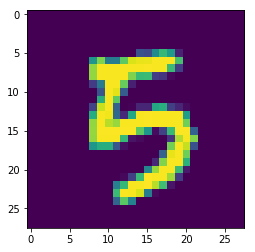

In [353]:
j = 9873
print("Label: ", Y_test[0][j])
plt.imshow(testImage[j])

## Saving the Predicted Values in .csv file

In [355]:
export_csv = read_sub.to_csv (r'C:\Users\akash\Desktop\Python Notebooks\DigitRecognizer\sample_submission.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path